In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df['age'].fillna(df['age'].median(), inplace=True)

df.drop(columns=['deck', 'embark_town'], inplace=True)

df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})
df['who'] = df['who'].map({'man': 0, 'woman': 1, 'child': 2})
df['alive'] = df['alive'].map({'yes': 1, 'no': 0})

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\4173653231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [3]:
rf_baseline = RandomForestClassifier(random_state=42)

rf_baseline.fit(X_train, y_train)

y_pred_baseline = rf_baseline.predict(X_test)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Akurasi Model Default: {accuracy_baseline:.2f}")

Akurasi Model Default: 0.80


In [4]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon
    'max_depth': [10, 20, None],     # Kedalaman pohon
    'min_samples_split': [2, 5, 10], # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]    # Minimum sampel di leaf node
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Hyperparameter Terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Hyperparameter Terbaik: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


Akurasi Model Setelah Tuning: 0.80

Classification Report Setelah Tuning:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



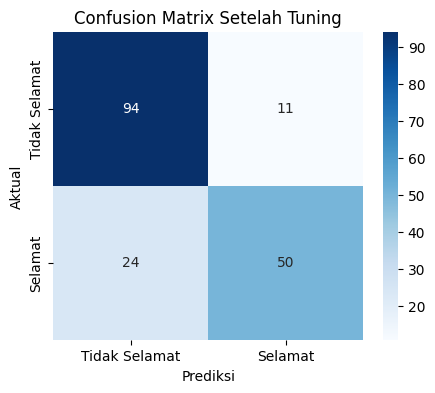

In [5]:
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Akurasi Model Setelah Tuning: {accuracy_best:.2f}")

print("\nClassification Report Setelah Tuning:")
print(classification_report(y_test, y_pred_best))

plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, cmap="Blues", fmt="d", xticklabels=["Tidak Selamat", "Selamat"], yticklabels=["Tidak Selamat", "Selamat"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Setelah Tuning")
plt.savefig('Day_037_01.png', format='png', dpi=300)
plt.show()